In [ ]:
Task-6 AI/ML

In [ ]:
#Installation of package

In [64]:
pip install statsmodels

In [ ]:
#visadataset

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\visadataset.csv")

# Display column names
print("Columns in Dataset:", df.columns)

# Define target variable
target_column = 'case_status'

# Check if target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Convert categorical columns to numerical
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Store encoders in case we need inverse transformation

# Convert all columns to numeric (in case of any mixed types)
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Ensure no NaN remains
if df.isna().sum().sum() > 0:
    raise ValueError("Dataset still contains NaN values after preprocessing!")

# Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Machine Learning Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Columns in Dataset: Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')
Mean Squared Error: 0.20266134279225684


In [ ]:
Sample data

In [ ]:
1. Basics of Machine Learning

In [66]:
#Supervised Learning: Regression (Linear Regression Example)

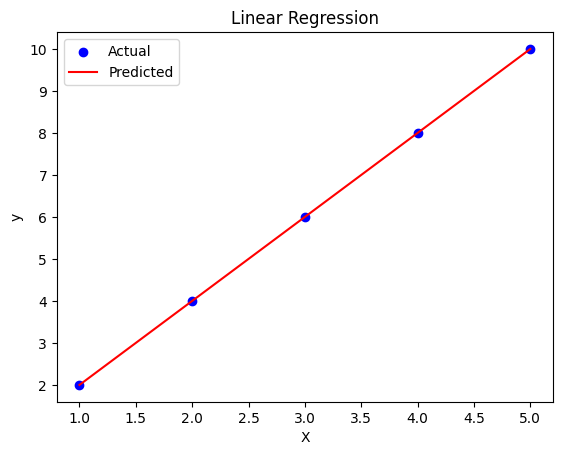

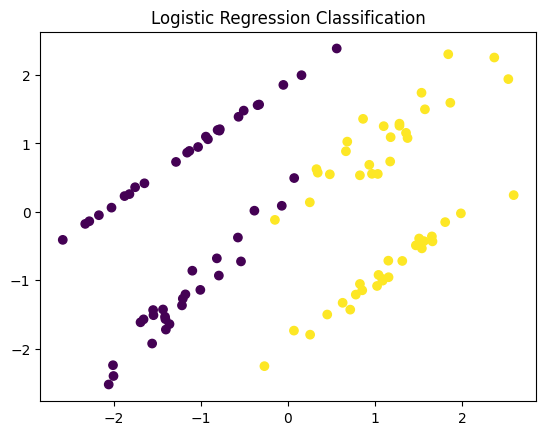

In [67]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#Classification (Logistic Regression Example)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate Synthetic Data
X, y = make_classification(n_samples=100, 
                           n_features=2,  # Total features
                           n_informative=2,  # Features that carry useful information
                           n_redundant=0,  # Features that are linear combinations of informative features
                           n_classes=2, 
                           random_state=42)

# Logistic Regression Model
clf = LogisticRegression()
clf.fit(X, y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Logistic Regression Classification")
plt.show()

In [ ]:
#Unsupervised Learning: Clustering (KMeans Example)

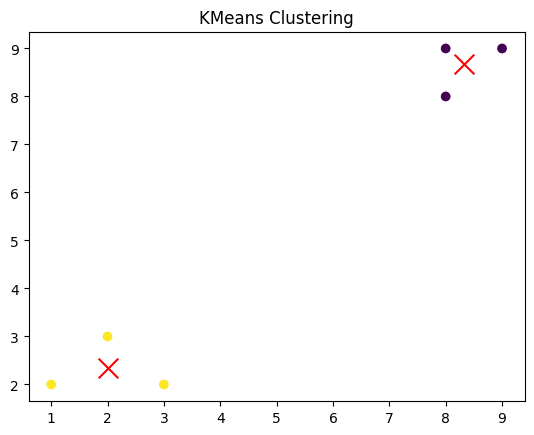

In [68]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
X = np.array([[1, 2], [2, 3], [3, 2], [8, 8], [9, 9], [8, 9]])

# KMeans Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title("KMeans Clustering")
plt.show()


In [ ]:
2. Data Handling and Preprocessing

In [ ]:
#Data Cleaning Example (Handling Missing Data)

In [69]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, None, 4], 'B': [5, None, None, 8]}
df = pd.DataFrame(data)

# Handling Missing Values (Updated Method)
df['A'] = df['A'].fillna(df['A'].mean())
df['B'] = df['B'].fillna(df['B'].mean())

# Display the DataFrame
print(df)


          A    B
0  1.000000  5.0
1  2.000000  6.5
2  2.333333  6.5
3  4.000000  8.0


In [ ]:
#Exploratory Data Analysis (EDA with Seaborn)

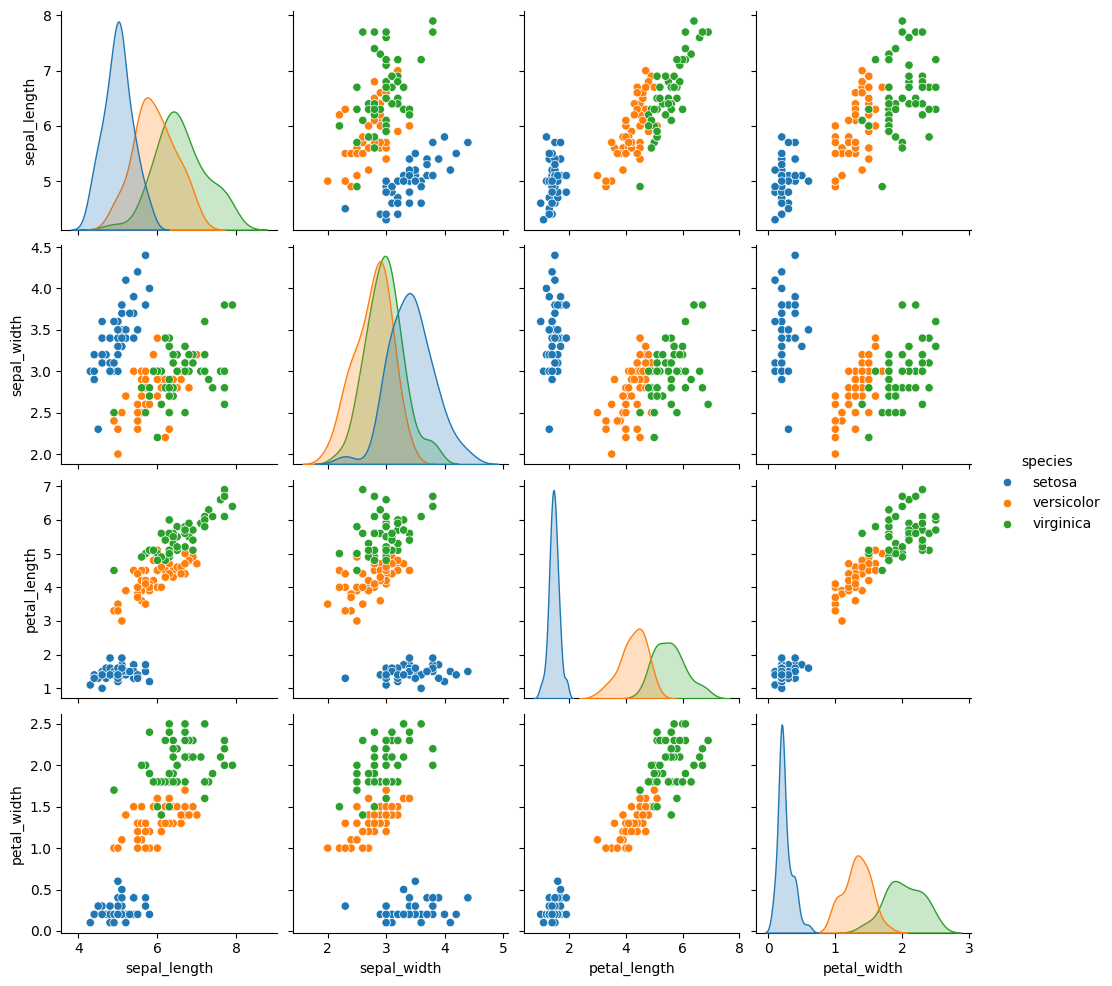

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Sample Dataset
df = sns.load_dataset('iris')

# Pairplot for EDA
sns.pairplot(df, hue='species')
plt.show()


In [ ]:
#Data Transformation (One-Hot Encoding and Scaling)

In [71]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample Data
data = {'Color': ['Red', 'Blue', 'Green'], 'Value': [10, 20, 30]}
df = pd.DataFrame(data)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)  # Updated argument
encoded = encoder.fit_transform(df[['Color']])
print("One-Hot Encoded Data:\n", encoded)


One-Hot Encoded Data:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
3. Statistical Foundations

In [ ]:
#Probability Distributions (Normal Distribution)

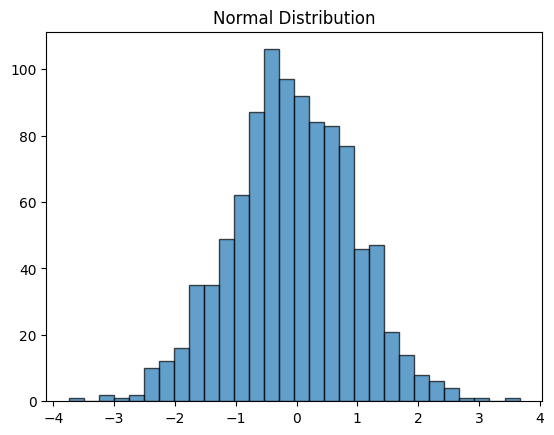

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Data
data = np.random.normal(loc=0, scale=1, size=1000)

# Plotting
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title("Normal Distribution")
plt.show()


In [ ]:
#Hypothesis Testing (T-Test Example)

In [73]:
from scipy.stats import ttest_ind

# Sample Data
group1 = [20, 21, 19, 18, 22]
group2 = [30, 29, 31, 32, 28]

# Perform T-Test
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: -10.0, P-Value: 8.488181527628498e-06


In [ ]:
4. Tools and Frameworks

In [ ]:
#Visualization with Matplotlib

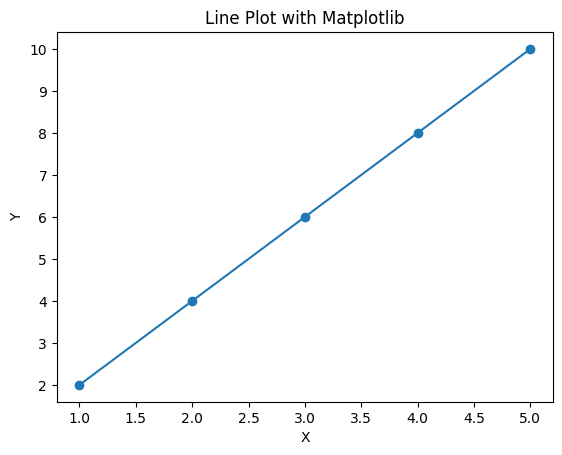

In [74]:
import matplotlib.pyplot as plt

# Sample Data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Line Plot
plt.plot(x, y, marker='o')
plt.title("Line Plot with Matplotlib")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
5. Algorithms and Techniques

In [ ]:
#Decision Tree Example

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 1.0


In [ ]:
6. Model Evaluation

In [ ]:
#Model Metrics Calculation

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Sample True and Predicted Labels
y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0])

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


Accuracy: 0.8, Precision: 1.0, Recall: 0.6666666666666666, F1-Score: 0.8


In [ ]:
#Load Data

In [77]:
import pandas as pd

# Load AirPassengers dataset
data = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\AirPassengers.csv")
print(data)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [ ]:
1. Basics of Machine Learning

In [ ]:
#Supervised Learning:

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AirPassengers dataset
data = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\AirPassengers.csv", parse_dates=["Month"])
data["Year"] = data["Month"].dt.year
data["Month_Num"] = data["Month"].dt.month


# Regression: 
X = data[["Year", "Month_Num"]]
y = data["#Passengers"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

# Evaluate regression
from sklearn.metrics import mean_squared_error
mse_reg = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error (Regression): {mse_reg:.2f}")


# Classification:
# Add a binary column: High if passengers > median, else Low
median_passengers = data["#Passengers"].median()
data["High_Low"] = np.where(data["#Passengers"] > median_passengers, 1, 0)

X_class = data[["Year", "Month_Num"]]
y_class = data["High_Low"]

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_cls, y_train_cls)
y_pred_cls = log_model.predict(X_test_cls)

# Evaluate classification
from sklearn.metrics import accuracy_score
accuracy_cls = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {accuracy_cls:.2f}")

Mean Squared Error (Regression): 1564.44
Classification Accuracy: 0.86


In [ ]:
#Unsupervised Learning:

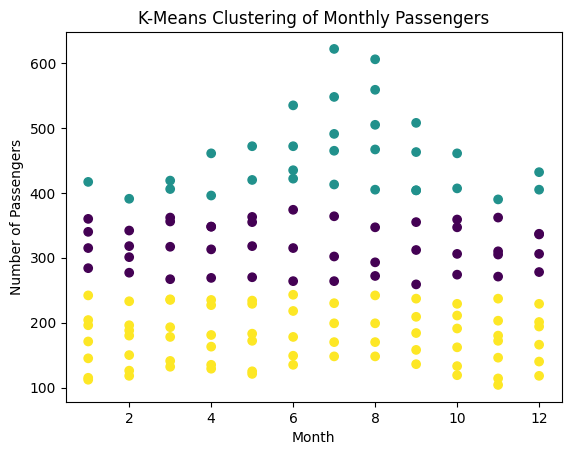

PCA Result (first 5 rows):
 [[-168.39519407   -5.10807943]
 [-162.39549169   -4.11045469]
 [-148.39863612   -3.11282995]
 [-151.39573109   -2.1152052 ]
 [-159.3910468    -1.11758046]]


In [79]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(data[["#Passengers"]])

# Visualize clustering
plt.scatter(data["Month_Num"], data["#Passengers"], c=data["Cluster"], cmap='viridis')
plt.title("K-Means Clustering of Monthly Passengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

# **Dimensionality Reduction using PCA**
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[["Year", "Month_Num", "#Passengers"]])
print("PCA Result (first 5 rows):\n", pca_result[:5])


In [ ]:
#Reinforcement Learning:

In [80]:
# RL example using synthetic environment (policy decision)
class Environment:
    """A simple RL environment that gives rewards for higher passenger predictions."""
    def __init__(self, passenger_target):
        self.passenger_target = passenger_target

    def step(self, action):
        """Reward if action (predicted passengers) is close to target."""
        reward = -abs(self.passenger_target - action)
        return reward

# Example usage:
env = Environment(300)  # Target: 300 passengers
action = 290  # Predicted number of passengers
reward = env.step(action)
print(f"Reward for action {action}: {reward}")

Reward for action 290: -10


In [ ]:
#Feature Engineering:

In [81]:
# **Extracting features: Lagged values and scaling**
# Feature Engineering: Lagged values and scaling
data["Lag_1"] = data["#Passengers"].shift(1).bfill()
data["Lag_2"] = data["#Passengers"].shift(2).bfill()

# Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[["Year", "Month_Num", "Lag_1", "Lag_2"]])
scaled_df = pd.DataFrame(scaled_features, columns=["Year", "Month_Num", "Lag_1", "Lag_2"])
print("Scaled Features (first 5 rows):\n", scaled_df.head())

Scaled Features (first 5 rows):
    Year  Month_Num     Lag_1     Lag_2
0   0.0   0.000000  0.015444  0.015444
1   0.0   0.090909  0.015444  0.015444
2   0.0   0.181818  0.027027  0.015444
3   0.0   0.272727  0.054054  0.027027
4   0.0   0.363636  0.048263  0.054054


In [ ]:
2. Data Handling and Preprocessing

In [ ]:
#Data Collection:

In [82]:
import pandas as pd

# Load AirPassengers dataset
data = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\AirPassengers.csv")

In [ ]:
#Data Cleaning:

In [83]:
# Check for missing values
print("Missing values before cleaning:\n", data.isnull().sum())

# Handle missing values by filling them with the mean of the "#Passengers" column
data['#Passengers'] = data['#Passengers'].fillna(data['#Passengers'].mean())

# Confirm no missing values
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values before cleaning:
 Month          0
#Passengers    0
dtype: int64
Missing values after cleaning:
 Month          0
#Passengers    0
dtype: int64


In [ ]:
#Exploratory Data Analysis (EDA)

Statistical Summary:
        #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


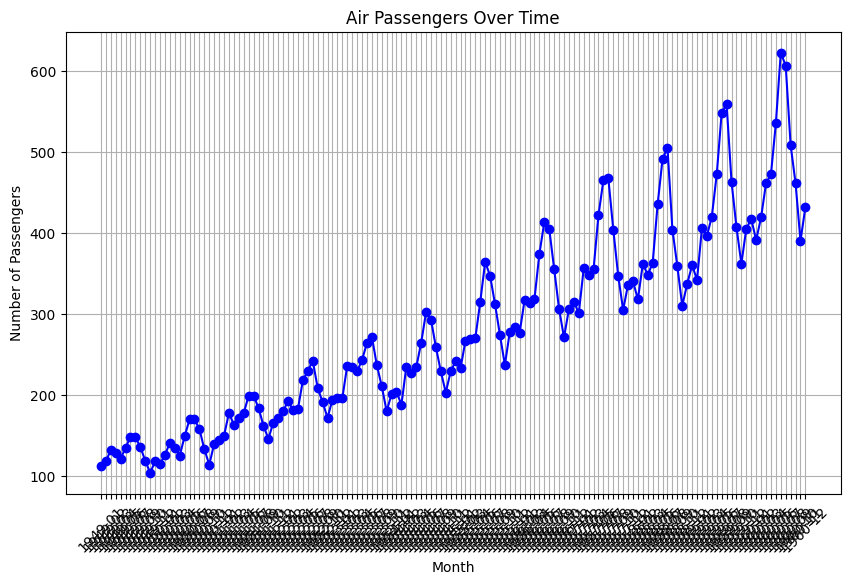

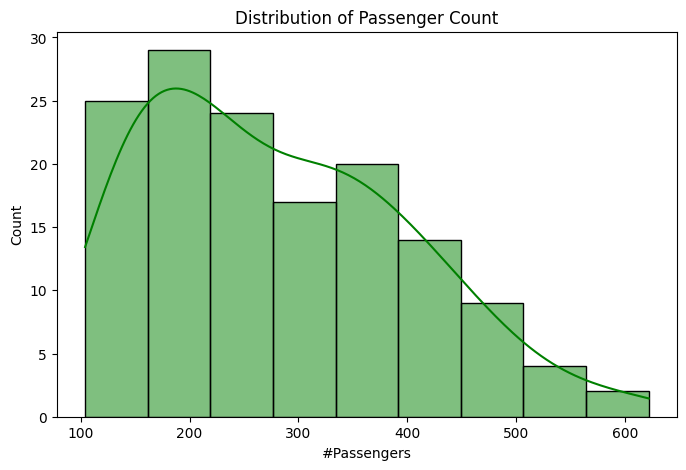

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary
print("Statistical Summary:\n", data.describe())

# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['#Passengers'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title("Air Passengers Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.grid()
plt.show()

# Histogram of passenger count
plt.figure(figsize=(8, 5))
sns.histplot(data['#Passengers'], kde=True, color='green')
plt.title("Distribution of Passenger Count")
plt.show()

In [ ]:
#Data Transformation:

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Convert 'Month' to datetime and extract year and month
data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].dt.year
data['Month_Num'] = data['Month'].dt.month

# Scaling passenger data
scaler = MinMaxScaler()
data['Passengers_Scaled'] = scaler.fit_transform(data[['#Passengers']])

# View the transformed data
print(data.head())

       Month  #Passengers  Year  Month_Num  Passengers_Scaled
0 1949-01-01          112  1949          1           0.015444
1 1949-02-01          118  1949          2           0.027027
2 1949-03-01          132  1949          3           0.054054
3 1949-04-01          129  1949          4           0.048263
4 1949-05-01          121  1949          5           0.032819


In [ ]:
#Outlier Detection

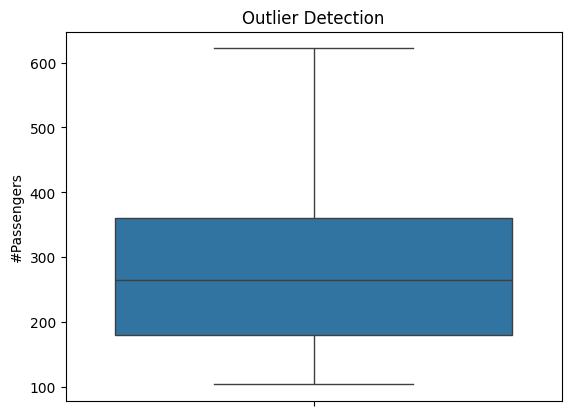

In [86]:
# Boxplot to detect outliers
sns.boxplot(data['#Passengers'])
plt.title("Outlier Detection")
plt.show()

In [ ]:
#Outlier Detection and Handling

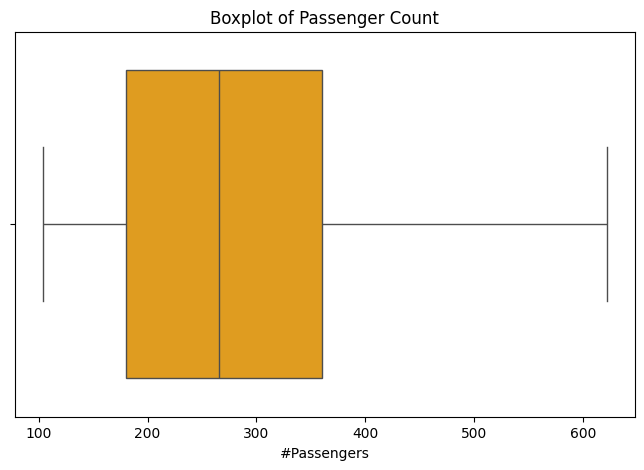

Data after removing outliers:
       Month  #Passengers  Year  Month_Num  Passengers_Scaled
0 1949-01-01          112  1949          1           0.015444
1 1949-02-01          118  1949          2           0.027027
2 1949-03-01          132  1949          3           0.054054
3 1949-04-01          129  1949          4           0.048263
4 1949-05-01          121  1949          5           0.032819


In [87]:
# Outlier detection using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['#Passengers'], color='orange')
plt.title("Boxplot of Passenger Count")
plt.show()

# Detect and remove outliers based on interquartile range (IQR)
Q1 = data['#Passengers'].quantile(0.25)
Q3 = data['#Passengers'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[(data['#Passengers'] >= lower_bound) & (data['#Passengers'] <= upper_bound)]

# Print data without outliers
print(f"Data after removing outliers:\n{data_no_outliers.head()}")


In [ ]:
3. Statistical Foundations

In [ ]:
#Probability Theory and Distributions

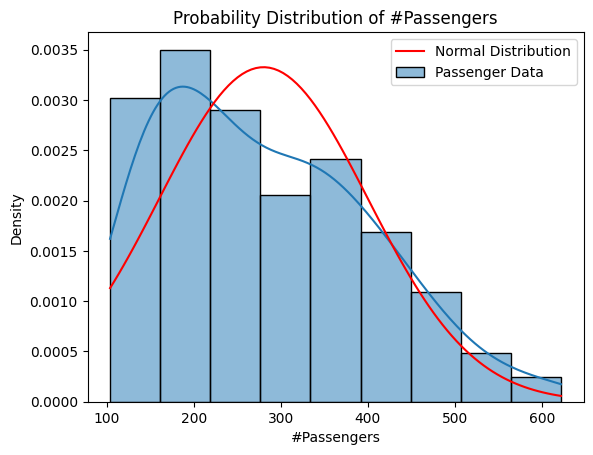

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and standard deviation
mean_passengers = data['#Passengers'].mean()
std_passengers = data['#Passengers'].std()

# Plotting the distribution
sns.histplot(data['#Passengers'], kde=True, stat="density", label='Passenger Data')

# Overlaying the theoretical normal distribution
x = np.linspace(data['#Passengers'].min(), data['#Passengers'].max(), 100)
y = (1 / (std_passengers * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_passengers) / std_passengers) ** 2)
plt.plot(x, y, label='Normal Distribution', color='red')

plt.title('Probability Distribution of #Passengers')
plt.legend()
plt.show()


In [ ]:
#Hypothesis Testing and Confidence Intervals

In [89]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp

# Check dataset size
print(f"Dataset size: {len(data)}")

# Ensure '#Passengers' is numeric
data['#Passengers'] = pd.to_numeric(data['#Passengers'], errors='coerce')

# Drop NaN values
data.dropna(subset=['#Passengers'], inplace=True)

# Ensure sufficient data for the test
if len(data) < 2:
    print("Not enough data for a t-test. At least 2 data points are required.")
else:
    # Compute mean and standard deviation
    mean_passengers = data['#Passengers'].mean()
    std_passengers = data['#Passengers'].std()

    # Hypothetical mean
    hypothetical_mean = 200

    # Perform one-sample t-test
    t_stat, p_value = ttest_1samp(data['#Passengers'], hypothetical_mean)

    # Confidence Interval (95%)
    ci = (mean_passengers - 1.96 * std_passengers / np.sqrt(len(data)),
          mean_passengers + 1.96 * std_passengers / np.sqrt(len(data)))

    # Print results
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    print(f"95% Confidence Interval: {ci}")

    # Conclusion
    if p_value < 0.05:
        print("Reject the null hypothesis: The mean significantly differs from 200.")
    else:
        print("Fail to reject the null hypothesis: No significant difference from 200.")


Dataset size: 144
T-statistic: 8.03, P-value: 0.0000
95% Confidence Interval: (np.float64(260.70411267709704), np.float64(299.8931095451251))
Reject the null hypothesis: The mean significantly differs from 200.


In [ ]:
#Correlation vs causation

                      Month  #Passengers          Year     Month_Num  \
Month              1.000000     0.923853  9.965457e-01  8.304428e-02   
#Passengers        0.923853     1.000000  9.218238e-01  6.364920e-02   
Year               0.996546     0.921824  1.000000e+00  1.344483e-14   
Month_Num          0.083044     0.063649  1.344483e-14  1.000000e+00   
Passengers_Scaled  0.923853     1.000000  9.218238e-01  6.364920e-02   

                   Passengers_Scaled  
Month                       0.923853  
#Passengers                 1.000000  
Year                        0.921824  
Month_Num                   0.063649  
Passengers_Scaled           1.000000  


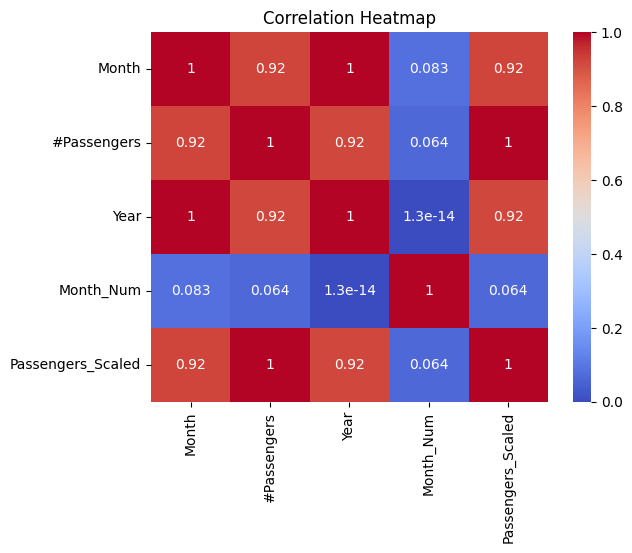

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Compute correlation
correlation = data.corr()
print(correlation)

# Visualize correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
4. Tools and Frameworks

In [ ]:
#Programming Languages:

In [91]:
import pandas as pd
import numpy as np

# Display the first few rows of the data
print(data.head())

# Calculate basic statistics using pandas
print("\nBasic Statistics:")
print(data.describe())

# Using NumPy to calculate mean and standard deviation
mean_passengers = np.mean(data['#Passengers'])
std_passengers = np.std(data['#Passengers'])
print(f"\nMean: {mean_passengers:.2f}, Std Dev: {std_passengers:.2f}")


       Month  #Passengers  Year  Month_Num  Passengers_Scaled
0 1949-01-01          112  1949          1           0.015444
1 1949-02-01          118  1949          2           0.027027
2 1949-03-01          132  1949          3           0.054054
3 1949-04-01          129  1949          4           0.048263
4 1949-05-01          121  1949          5           0.032819

Basic Statistics:
                     Month  #Passengers         Year   Month_Num  \
count                  144   144.000000   144.000000  144.000000   
mean   1954-12-16 05:00:00   280.298611  1954.500000    6.500000   
min    1949-01-01 00:00:00   104.000000  1949.000000    1.000000   
25%    1951-12-24 06:00:00   180.000000  1951.750000    3.750000   
50%    1954-12-16 12:00:00   265.500000  1954.500000    6.500000   
75%    1957-12-08 18:00:00   360.500000  1957.250000    9.250000   
max    1960-12-01 00:00:00   622.000000  1960.000000   12.000000   
std                    NaN   119.966317     3.464102    3.464102 

In [ ]:
#Visualization:

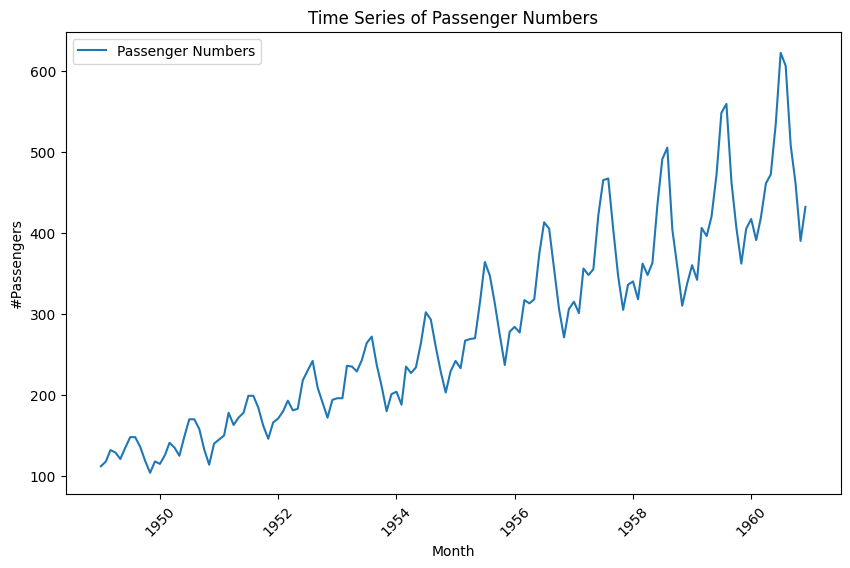

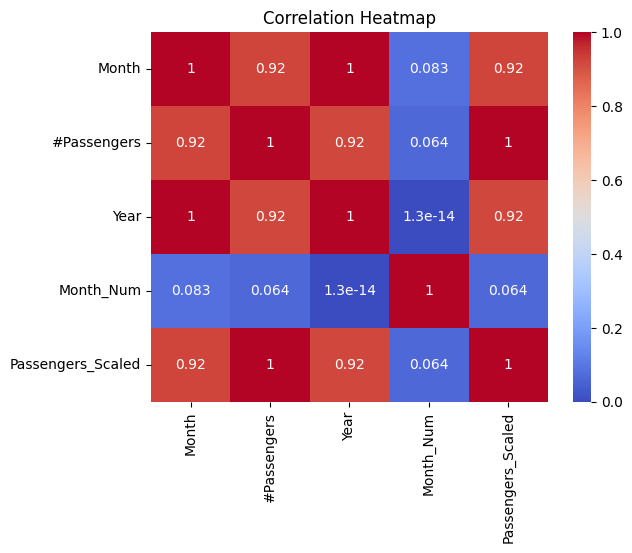

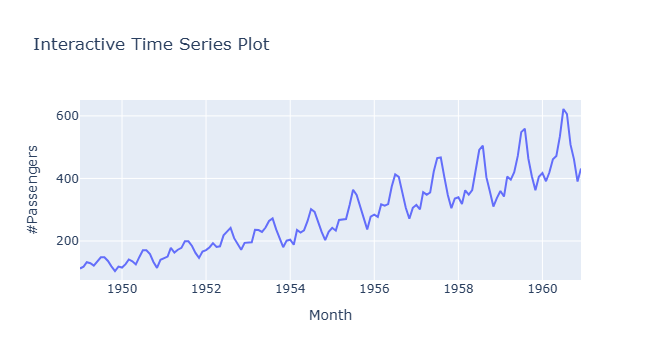

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of passenger numbers
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['#Passengers'], label='Passenger Numbers')
plt.title('Time Series of Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.show()
df = pd.DataFrame(data)
# Seaborn heatmap for correlation
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

import plotly.express as px

# Interactive line plot
fig = px.line(data, x='Month', y='#Passengers', title='Interactive Time Series Plot')
fig.show()

In [ ]:
#ML Frameworks:

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Creating lagged features
data['Lag_1'] = data['#Passengers'].shift(1).fillna(data['#Passengers'].mean())

# Splitting the data into training and test sets
X = data[['Lag_1']]
y = data['#Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
score = model.score(X_test, y_test)
print(f"Linear Regression R-squared: {score:.2f}")


Linear Regression R-squared: 0.91


In [ ]:
#Data Handling:

In [94]:
print(data.columns)
print(data.dtypes)
filtered_data = data[data["#Passengers"] > 400]
print(filtered_data)

Index(['Month', '#Passengers', 'Year', 'Month_Num', 'Passengers_Scaled',
       'Lag_1'],
      dtype='object')
Month                datetime64[ns]
#Passengers                   int64
Year                          int32
Month_Num                     int32
Passengers_Scaled           float64
Lag_1                       float64
dtype: object
         Month  #Passengers  Year  Month_Num  Passengers_Scaled  Lag_1
90  1956-07-01          413  1956          7           0.596525  374.0
91  1956-08-01          405  1956          8           0.581081  413.0
101 1957-06-01          422  1957          6           0.613900  355.0
102 1957-07-01          465  1957          7           0.696911  422.0
103 1957-08-01          467  1957          8           0.700772  465.0
104 1957-09-01          404  1957          9           0.579151  467.0
113 1958-06-01          435  1958          6           0.638996  363.0
114 1958-07-01          491  1958          7           0.747104  435.0
115 1958-08-01     

In [ ]:
5. Algorithms and Techniques

In [ ]:
#Regression Models:

In [95]:
# Linear Regression for time series forecasting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering: Using lag features for time series forecasting
data['Lag_1'] = data['#Passengers'].shift(1).fillna(data['#Passengers'].mean())

# Splitting data
X = data[['Lag_1']]
y = data['#Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Binary Classification: Label as 1 if passengers > 400, else 0
data['High_Passengers'] = (data['#Passengers'] > 400).astype(int)

# Features and target
X_class = data[['Lag_1']]
y_class = data['High_Passengers']

# Splitting data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Predictions and evaluation
y_pred_class = logistic_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Logistic Regression Accuracy: {accuracy}")


Linear Regression MSE: 925.0288485582821
Logistic Regression Accuracy: 0.896551724137931


In [ ]:
#Tree-Based Models:

In [96]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression MSE: {mse_tree}")

from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regression MSE: {mse_forest}")

from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regression MSE: {mse_gb}")


Decision Tree Regression MSE: 1251.3455390917538
Random Forest Regression MSE: 1203.9006242698065
Gradient Boosting Regression MSE: 1142.1096773742465


In [ ]:
6. Model Evaluation

In [ ]:
#Metrics:

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# Use the new function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# MSE calculation remains the same
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

print(f"Linear Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAPE: {mape:.2f}%")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
roc_auc = roc_auc_score(y_test_class, logistic_model.predict_proba(X_test_class)[:, 1])

print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")


Linear Regression Metrics:
RMSE: 30.414286915170017
MSE: 925.0288485582821
MAPE: 9.60%
Logistic Regression Metrics:
Accuracy: 0.896551724137931
Precision: 0.5
Recall: 0.6666666666666666
F1-Score: 0.5714285714285714
AUC-ROC: 0.9615384615384615


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Assuming y_test and y_pred are already defined from previous code

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 25.07
Mean Squared Error (MSE): 925.03
Root Mean Squared Error (RMSE): 30.41
R^2 Score: 0.91


In [ ]:
#Cross-Validation and Hyperparameter Tuning

In [99]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation for the linear regression model
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validation MSE: {mean_cv_score}")


Mean Cross-Validation MSE: 1472.9842126757098


In [102]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
#Bias-variance

In [103]:
# Training error
train_pred = linear_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

# Test error
test_mse = mean_squared_error(y_test, y_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Bias-Variance Interpretation
if train_mse > 1.5 * test_mse:
    print("High Bias: The model underfits the data.")
elif test_mse > 1.5 * train_mse:
    print("High Variance: The model overfits the data.")
else:
    print("The model has a good balance of bias and variance.")


Training MSE: 1396.673268039897
Test MSE: 925.0288485582821
High Bias: The model underfits the data.


In [ ]:
7. Advanced Topics

In [ ]:
#Time Series Analysis

In [104]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['#Passengers'], order=(5, 1, 0))
arima_result = model.fit()

# Forecast next 12 months
forecast = arima_result.forecast(steps=12)
print("Forecast for next 12 months:")
print(forecast)

Forecast for next 12 months:
144    489.459724
145    513.421772
146    523.538287
147    505.021116
148    481.184566
149    471.972591
150    473.299157
151    482.408891
152    491.484806
153    494.185151
154    491.917082
155    487.640959
Name: predicted_mean, dtype: float64


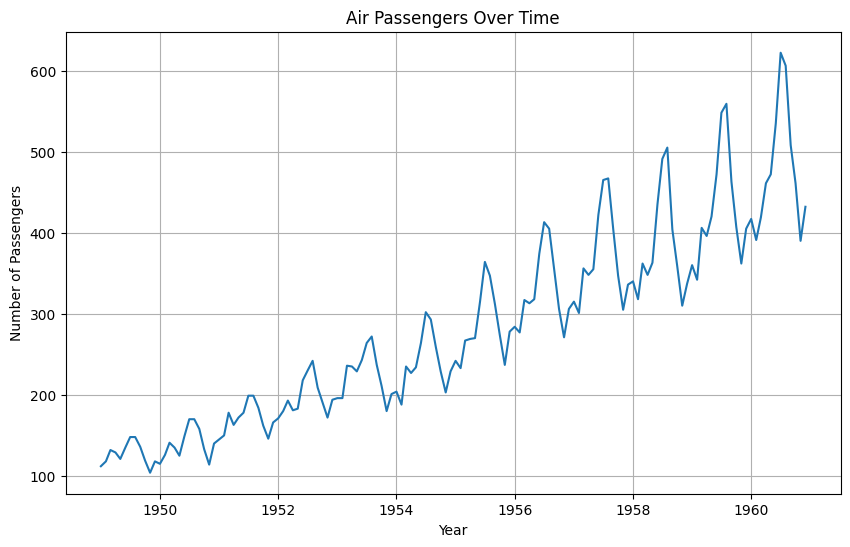

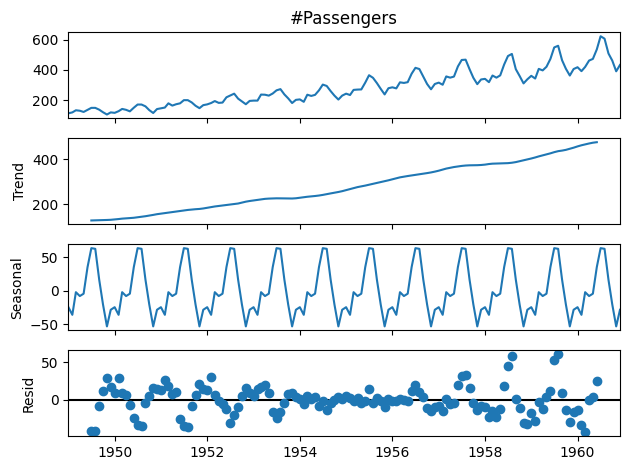

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
The series is not stationary.


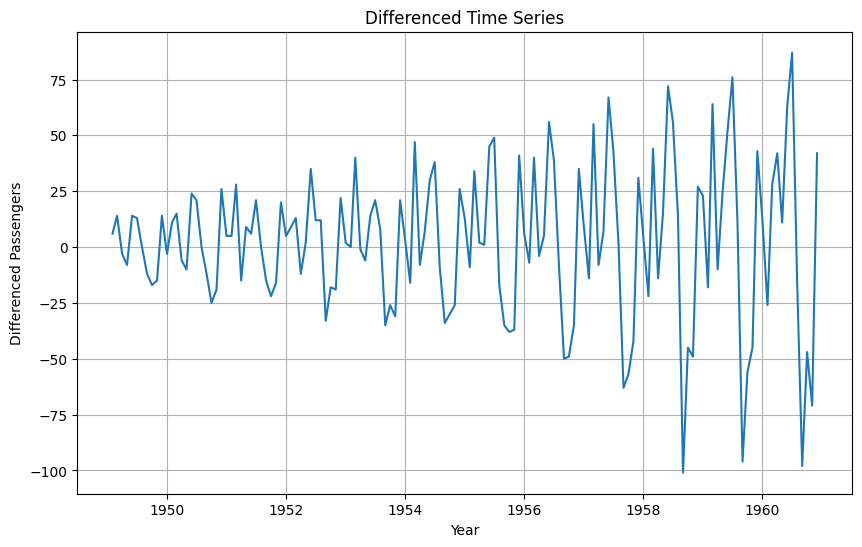

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 11 Mar 2025   AIC                           1394.683
Time:                        20:03:10   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

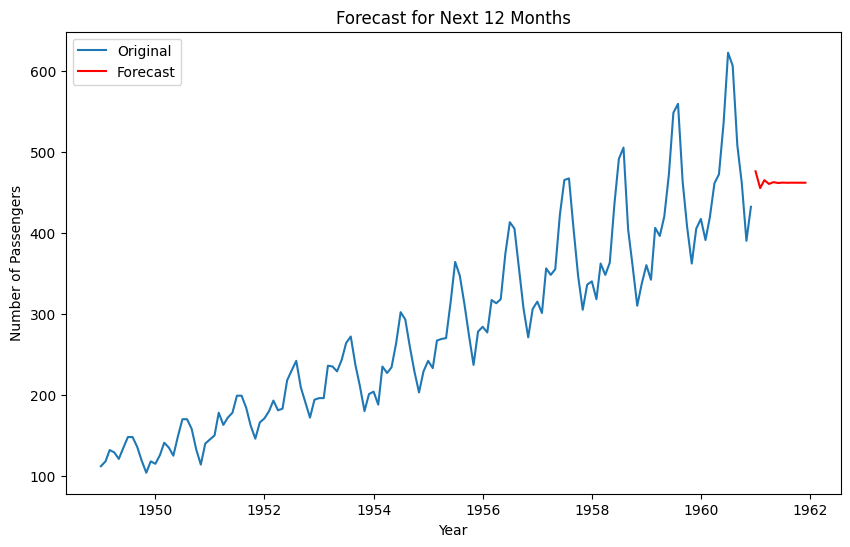

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
data = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\AirPassengers.csv", parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'
# Step 1: Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['#Passengers'])
plt.title('Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Step 2: Decomposition of the time series
decomposition = seasonal_decompose(data['#Passengers'], model='additive')
decomposition.plot()
plt.show()

# Step 3: Check stationarity with Augmented Dickey-Fuller test
result = adfuller(data['#Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# Step 4: Apply differencing (if non-stationary)
data_diff = data['#Passengers'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff)
plt.title('Differenced Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.show()

# Step 5: Forecasting with ARIMA
# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(data['#Passengers'], order=(1, 1, 1))
arima_result = model.fit()

# Print summary of ARIMA model
print(arima_result.summary())

# Step 6: Forecast next 12 months
forecast = arima_result.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['#Passengers'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Forecast for Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
